In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Kütüphaneler yüklendi.")

Kütüphaneler yüklendi.


In [6]:
dosya_adi = "netflix_titles.csv"
df = pd.read_csv(dosya_adi)

print("Veri seti yüklendi.")

Veri seti yüklendi.


In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [10]:
print("--- TEMİZLİK ÖNCESİ ---")
print(df.isnull().sum())
print("\n") # Boşluk bırak

df['director'] = df['director'].fillna('Bilinmiyor')
df['cast'] = df['cast'].fillna('Bilinmiyor')
df['country'] = df['country'].fillna('Bilinmiyor')

df = df.dropna(subset=['date_added', 'rating', 'duration'])

print("--- TEMİZLİK SONRASI ---")
print(df.isnull().sum())

--- TEMİZLİK ÖNCESİ ---
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


--- TEMİZLİK SONRASI ---
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [11]:
# Başlamadan önce satır sayısı
print(f"--- Parçalamadan Önceki Toplam Satır Sayısı: {len(df)} ---")
print("\n")

df['listed_in'] = df['listed_in'].str.split(',')

df = df.explode('listed_in')

df['listed_in'] = df['listed_in'].str.strip()


# --- İŞLEM SONRASI KONTROL ---
print(f"--- Parçaladıktan Sonraki Toplam Satır Sayısı: {len(df)} ---")
print("\n")

print("İşlem sonrası 'listed_in' sütunundaki en yaygın 10 tür:")
print(df['listed_in'].value_counts().head(10))

--- Parçalamadan Önceki Toplam Satır Sayısı: 8790 ---


--- Parçaladıktan Sonraki Toplam Satır Sayısı: 19294 ---


İşlem sonrası 'listed_in' sütunundaki en yaygın 10 tür:
listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


--- Eşsiz İçerik Türü Sayıları (Doğru Olan) ---
type
Movie      6126
TV Show    2664
Name: count, dtype: int64




/tmp/ipython-input-2192675949.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=unique_shows, order=true_type_counts.index, palette="viridis")


Grafik 'netflix_type_distribution.png' adıyla başarıyla kaydedildi.


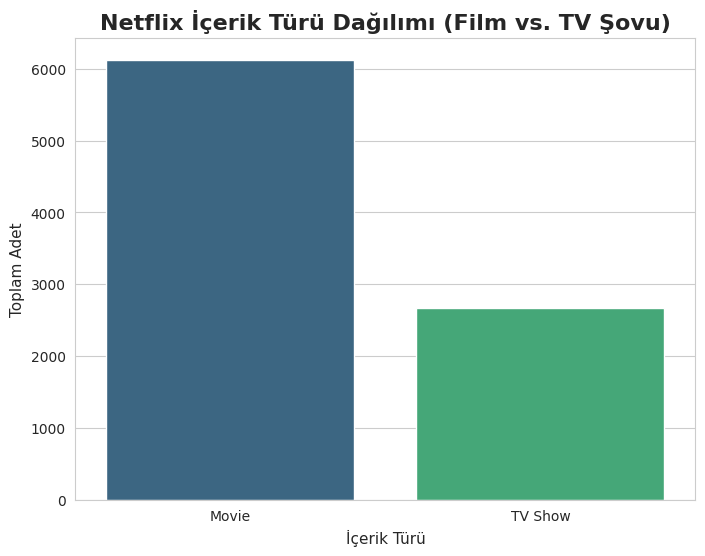

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

unique_shows = df[['show_id', 'type']].drop_duplicates()

print("--- Eşsiz İçerik Türü Sayıları (Doğru Olan) ---")
true_type_counts = unique_shows['type'].value_counts()
print(true_type_counts)
print("\n")

plt.figure(figsize=(8, 6))

sns.countplot(x='type', data=unique_shows, order=true_type_counts.index, palette="viridis")

plt.title('Netflix İçerik Türü Dağılımı (Film vs. TV Şovu)', fontsize=16, fontweight='bold')
plt.xlabel('İçerik Türü', fontsize=11)
plt.ylabel('Toplam Adet', fontsize=11)

plt.savefig('netflix_type_distribution.png', dpi=300)

print("Grafik 'netflix_type_distribution.png' adıyla başarıyla kaydedildi.")

**Yorum 1**: Netflix, içerik türü bakımından filmlerin belirgin bir şekilde hakimiyetindedir. Platformda, her 3 içerikten yaklaşık 2'si filmdir, yaklaşık %69'a %31'lik bir oran. Bu, Netflix'in stratejisinin hem diziler hem de filmler üzerine kurulu olduğunu, **ancak** önceliği büyük ölçüde filmlere vererek daha bağlılık gerektiren dizileri ikinci plana aldığını göstermektedir.

--- En Popüler 10 Tür ---
listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64




/tmp/ipython-input-3423841996.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette="mako")


Grafik 'top_10_genres.png' adıyla başarıyla kaydedildi.


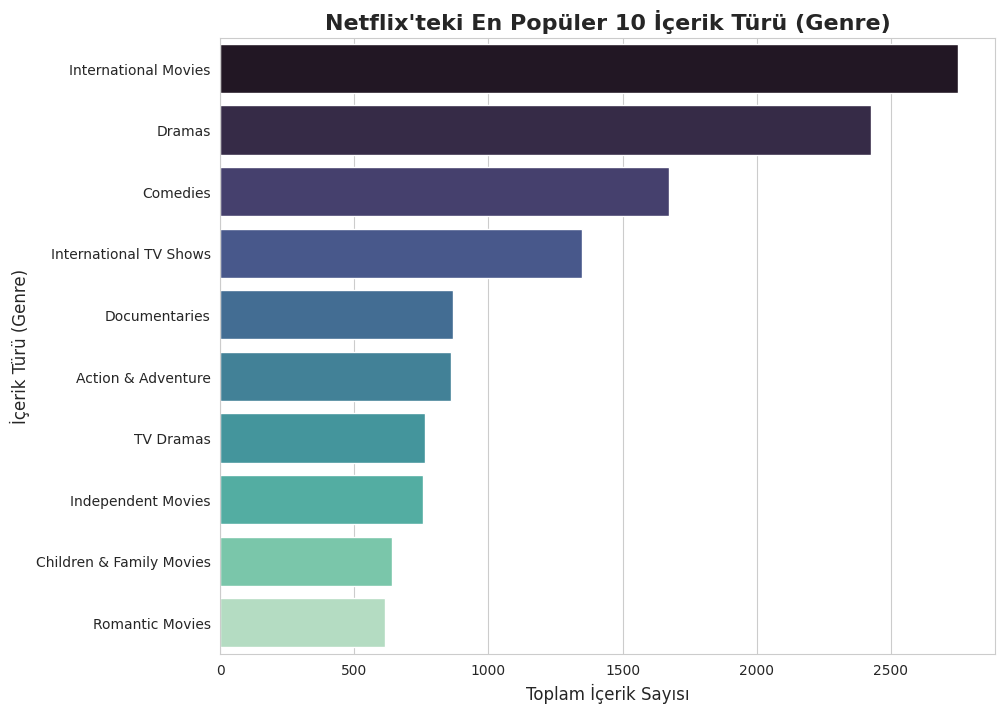

In [13]:
top_10_genres = df['listed_in'].value_counts().head(10)

print("--- En Popüler 10 Tür ---")
print(top_10_genres)
print("\n")

plt.figure(figsize=(10, 8))

sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette="mako")

plt.title('Netflix\'teki En Popüler 10 İçerik Türü (Genre)', fontsize=16, fontweight='bold')
plt.xlabel('Toplam İçerik Sayısı', fontsize=12)
plt.ylabel('İçerik Türü (Genre)', fontsize=12)

plt.savefig('top_10_genres.png', dpi=300, bbox_inches='tight')

print("Grafik 'top_10_genres.png' adıyla başarıyla kaydedildi.")

**Yorum 2**: Netflix'in içerik stratejisi belirgin bir şekilde "Uluslararası" (International) odaklıdır. En popüler 10 tür listesine baktığımızda, 1. sırada "International Movies" (Uluslararası Filmler) ve 4. sırada "International TV Shows" (Uluslararası Diziler) yer almaktadır. Bu iki "uluslararası" kategori, platformdaki diğer tüm türlerden (Dram, Komedi vb.) sayıca **çok daha baskındır**. Bu durum, Netflix'in sadece bir pazara **değil**, küresel bir pazara aktif olarak içerik sağladığını net bir şekilde ortaya koymaktadır.

**Not**: Tabloda gördüğümüz Dramas bir mega tür, Romantic Movies ise onun bir alt türüdür. Bu tablonun yorumlanması sırasında dikkate alınmalı ve buna göre yorum yapılmalıdır. Birçok film hem romantik hem de drama olarak işaretlidir, Bunun sebebi ise Netflix'in veritabanında kullandığı kategorizasyon tercihidir.

--- Yıllara Göre Eklenen Eşsiz İçerik Sayısı ---
added_year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      10
2014      23
2015      73
2016     415
2017    1161
2018    1624
2019    1999
2020    1878
2021    1498
Name: count, dtype: int64


Grafik 'netflix_growth_over_time.png' adıyla başarıyla kaydedildi.


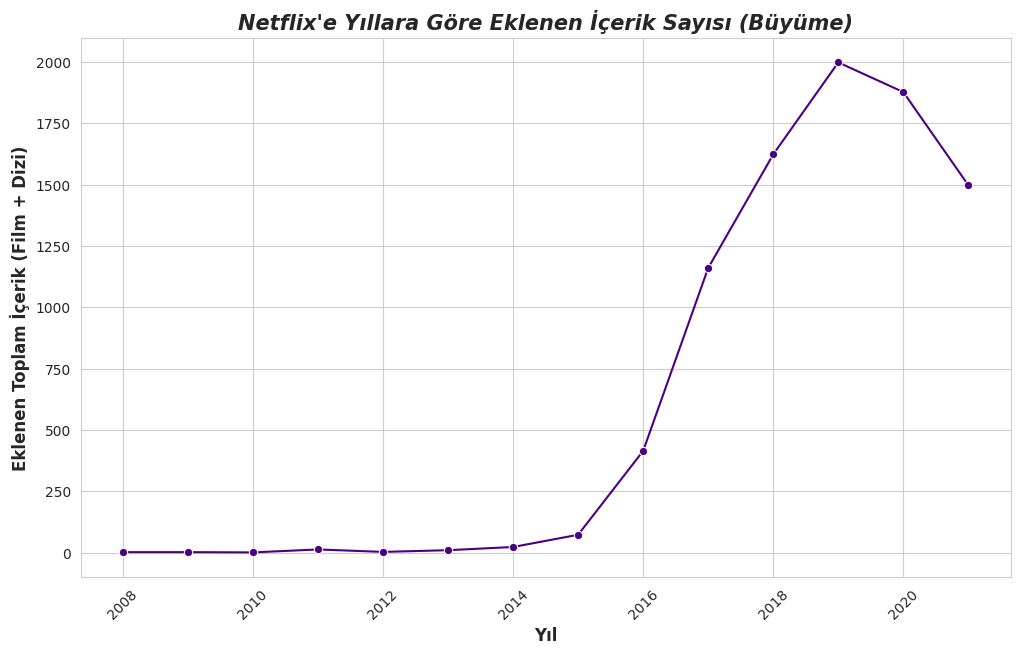

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

df['added_year'] = df['date_added'].dt.year

content_added_per_year = df.drop_duplicates(subset=['show_id'])['added_year'].value_counts().sort_index()
content_added_per_year.index = content_added_per_year.index.astype(int)

print("--- Yıllara Göre Eklenen Eşsiz İçerik Sayısı ---")
print(content_added_per_year)
print("\n")

plt.figure(figsize=(12, 7))

sns.lineplot(x=content_added_per_year.index, y=content_added_per_year.values, marker='o', color='indigo')

plt.title('Netflix\'e Yıllara Göre Eklenen İçerik Sayısı (Büyüme)', fontsize=15, fontweight='bold', fontstyle='italic')
plt.xlabel('Yıl', fontsize=12, fontweight='bold')
plt.ylabel('Eklenen Toplam İçerik (Film + Dizi)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True)

plt.savefig('netflix_growth_over_time.png', dpi=300, bbox_inches='tight')

print("Grafik 'netflix_growth_over_time.png' adıyla başarıyla kaydedildi.")

**Yorum 3**: Yukarıdaki grafiği incelediğimizde ilk göze çarpan, 2015 yılında 73'den 2017'de 1161'e yükselen iki yıllık zaman diliminde yaşanmış **yaklaşık 16 katlık** bir hacim artışıdır. Ardından bu ivme 2019 yılında zirveye ulaşmış (1999 içerik) ancak Covid pandemisinin neden olduğu **prodüksiyon problemleri** nedeniyle yeni içerik üretimi yavaşlamış, ve gecikmeli üretim nedeniyle 2021'e gelindiğinde (1498 içerik) zirveye (2019'a) göre **yaklaşık 25% lik düşüş** yaşanmıştır.